# Lesson 13 activity: probability distributions

## Learning objectives

This activity will help you to:

1. Understand and apply binomial distributions to model discrete events
2. Demonstrate the Central Limit Theorem through sampling distributions
3. Visualize theoretical and empirical probability distributions
4. Connect statistical theory to real-world data analysis

## Setup

Import the required libraries and load the weather dataset.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
# Load the weather dataset
url = 'https://gperdrizet.github.io/FSA_devops/assets/data/unit2/weather.csv'
df = pd.read_csv(url)
df.head()

,weather_condition,wind_strength,temperature_c,rainfall_inches,humidity_percent,pressure_hpa
0,Sunny,Light Breeze,8.2,0.13,48.8,1016.5
1,Snowy,Gale,1.6,0.29,89.6,1009.4
2,Rainy,Strong Wind,7.3,0.01,100.0,1003.3
3,Cloudy,Light Breeze,21.6,0.62,49.3,1006.9
4,Sunny,Calm,12.0,1.09,38.6,1016.0
...,...,...,...,...,...,...
360,Sunny,Strong Wind,1.4,0.51,58.0,1018.7
361,Cloudy,Calm,6.6,0.65,57.6,1011.5
362,Cloudy,Moderate Wind,13.6,0.08,56.4,1009.4
363,Cloudy,Light Breeze,-3.2,0.07,78.4,1015.1


## Exercise 1: binomial distribution - modeling rainy days

**Objective**: Understand and visualize binomial distributions using real weather data.

The binomial distribution models the number of successes in a fixed number of independent trials. In weather forecasting, we can use it to model the probability of rainy days over a period of time.

**Tasks**:

1. **Calculate the probability of rain**:
   - Count how many days in the dataset have `rainfall_inches > 0`
   - Calculate the proportion of rainy days (this is your probability `p`)
   - Print this probability with an interpretation (e.g., "Based on our data, there's a X% chance of rain on any given day")

2. **Create a theoretical binomial distribution**:
   - Assume you're looking at a 30-day period (like a month)
   - Using the probability from step 1, calculate the theoretical probability of getting exactly k rainy days for k = 0, 1, 2, ..., 30
   - Use `scipy.stats.binom.pmf()`

3. **Visualize the distribution**:
   - Create a bar plot showing the probability of each possible number of rainy days (0 to 30)
   - Add a vertical line showing the expected value (mean = n × p)
   - Label the axes appropriately
   - Include a title with the probability of rain

4. **Interpret** your findings:
   - What is the most likely number of rainy days in a 30-day period?
   - What is the expected (mean) number of rainy days?
   - What's the probability of having 15 or more rainy days in a month?
   - How does this distribution help weather forecasters make predictions?
   - **Bonus**: Calculate the standard deviation and explain what it tells you about the variability in monthly rainfall patterns

Looking at the sample taken, theres a 0.19 percent chance that it is a rainy day at any given time.
Day 0: 0.0015192665593599655
Day 1: 0.01100693119536311
Day 2: 0.03854297845451151
Day 3: 0.08687464984985088
Day 4: 0.1416145440154456
Day 5: 0.17783703962755976
Day 6: 0.17894600075902398
Day 7: 0.14816520179464363
Day 8: 0.10287150277663758
Day 9: 0.06072762182052507
Day 10: 0.030797579637551947
Day 11: 0.013522746779630114
Day 12: 0.005170687473276941
Day 13: 0.001728973990279418
Day 14: 0.0005070144816004026
Day 15: 0.00013060509095194032
Day 16: 2.9569392403022213e-05
Day 17: 5.8807475087243074e-06
Day 18: 1.025685931699269e-06
Day 19: 1.5644189291224066e-07
Day 20: 2.0779101762663287e-08
Day 21: 2.3895630468887135e-09
Day 22: 2.360746423874289e-10
Day 23: 1.9829990664900855e-11
Day 24: 1.396755294849165e-12
Day 25: 8.095479668105373e-14
Day 26: 3.7596746234659935e-15
Day 27: 1.3451090867527609e-16
Day 28: 3.48042074196232e-18
Day 29: 5.796619110469721e-20
Day 30: 4.666212662623024

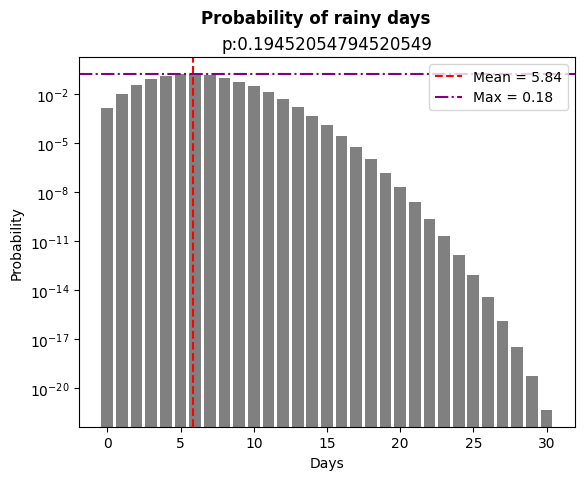

In [95]:
rainy_days = df[df['weather_condition'] == 'Rainy']
# rainy_days = df[df['rainfall_inches'] > 0]
p = len(rainy_days)/len(df)
print(f'Looking at the sample taken, theres a {p:.2f} percent chance that it is a rainy day at any given time.')

n = 30
k_values = list(range(n+1))
dist = [stats.binom.pmf(k, n, p) for k in k_values]
for x in dist:
    print(f'Day {dist.index(x)}: {x}')

mean, var = stats.binom.stats(n, p)     #Grabbing the return moments mean and variance

plt.title(f'p:{p}')
plt.suptitle('Probability of rainy days ', fontweight='bold')
plt.bar(k_values, dist, color='gray')
plt.yscale('log')       #I wanted to show the probability with a log scale since the values are so low to the left side with lower day counts
plt.xlabel('Days')
plt.ylabel('Probability')
plt.axvline(mean, color='red', linestyle='--', label=f'Mean = {mean:.2f}')
plt.axhline(max(dist), color='purple', linestyle='-.', label=f'Max = {max(dist):.2f}')
plt.legend()

plt.show()

1. Looking at the data and understanding the probablity mass function knowing that p is 99% we EXPECT the chances of rain everyday to be high. 
2. So in a 30 day window we are expecting the mean of 29 or days of rain. 
3. The reason for the lower days being so abysmally low is because having only 10 or 20 days on a 99% chance of rain is highly unexpected. We are expecting higher than at LEAST 25 which is still unlikely. 
4. This distribution would help immensely with weather prediction as you cna understand or assume the predicted range of days of rain for things such as a month like we showcased here. Most go by weeks in today's news but, either way it helps us prepare for the likelihood of rain.

## Exercise 2: central limit theorem - sampling distribution of rainfall

**Objective**: Demonstrate the Central Limit Theorem by creating and analyzing a sampling distribution.

The Central Limit Theorem (CLT) states that the distribution of sample means approaches a normal distribution as the sample size increases, regardless of the population's original distribution. This is fundamental to statistical inference.

**Tasks**:

1. **Examine the population distribution**:
   - Create a histogram of all `rainfall_inches` values in the dataset
   - Calculate and print the population mean and standard deviation
   - Note the shape of this distribution (is it normal, skewed, etc.?)

2. **Create a sampling distribution**:
   - Take 1000 random samples from the rainfall data, each of size n=30
   - For each sample, calculate the mean rainfall
   - Store all 1000 sample means in a list or array
   - Hint: Use `df['rainfall_inches'].sample(n=30, replace=True)` for each sample

3. **Visualize the sampling distribution**:
   - Create a histogram of the 1000 sample means
   - Overlay a normal distribution curve using the theoretical mean (μ) and standard error (σ/√n)
   - Add a vertical line at the population mean
   - You can use `scipy.stats.norm.pdf()` to create the normal curve
   - Label axes and add a descriptive title

4. **Compare distributions**:
   - Create two side-by-side histograms:
     - Left: Original rainfall distribution (from step 1)
     - Right: Sampling distribution of means (from step 3)
   - Make sure both use the same y-axis scale for comparison
   - Include the mean and standard deviation in each subplot title

5. **Interpret** your findings:
   - How does the shape of the sampling distribution compare to the original distribution?
   - Is the sampling distribution approximately normal? (This demonstrates the CLT!)
   - Calculate the standard error: population σ divided by √30. How does this compare to the standard deviation of your sample means?
   - What does the CLT tell us about why we can use normal-based methods (like confidence intervals) even when our data isn't normally distributed?
   - **Bonus**: Repeat the experiment with different sample sizes (n=5, n=10, n=50). How does sample size affect the spread and normality of the sampling distribution?

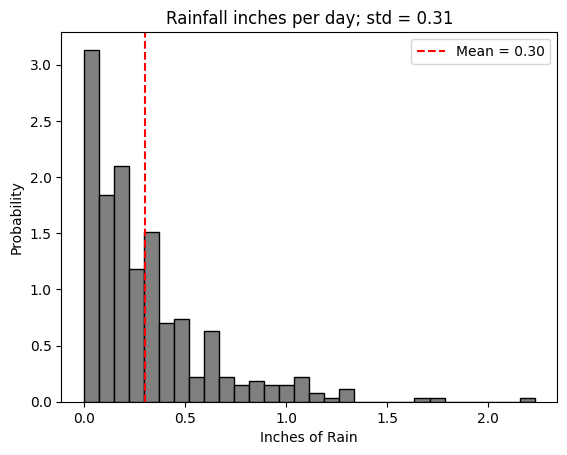

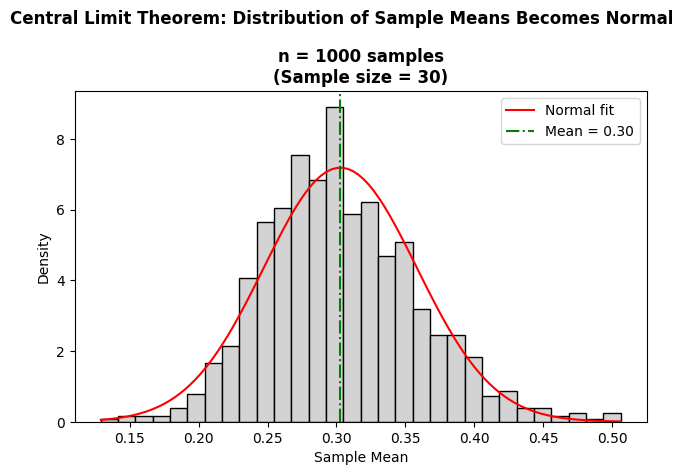

In [ ]:
rainfall_inches = df['rainfall_inches']

plt.hist(rainfall_inches, bins=30, color='gray', edgecolor='black', density=True)
plt.xlabel('Inches of Rain')
plt.ylabel('Probability')
mean = rainfall_inches.mean()
plt.axvline(mean, color='red', linestyle='--', label=f'Mean = {mean:.2f}')
std = rainfall_inches.std()
# plt.text(mean + std, 0, f'std = {std:.2f}', color='lightgray')

plt.title(f'Rainfall inches per day; std = {std:.2f}')
plt.legend()
plt.show()


num_samples = 1000
sample_size = 30

sample_means = []
for _ in range(num_samples):
    sample = rainfall_inches.sample(n=sample_size, replace=True)
    sample_means.append(sample.mean())
sample_means = np.array(sample_means)

#Create our histogram of the collected sample means 
plt.hist(sample_means, bins=30, color='lightgray', edgecolor='black', density=True)

#Create our normal distribution lineplot 
mu = sample_means.mean()
sigma = sample_means.std()
mean_line = np.linspace(sample_means.min(), sample_means.max(), 100)
plt.plot(mean_line, stats.norm(mu, sigma).pdf(mean_line), 'r-', label='Normal fit')

plt.title(f'n = {num_samples} samples\n(Sample size = {sample_size})', fontweight='bold')
plt.axvline(mu, color='green', linestyle='-.', label=f'Mean = {mean:.2f}')
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.suptitle('Central Limit Theorem: Distribution of Sample Means Becomes Normal', fontweight='bold')
plt.legend()
plt.tight_layout()
plt.show()
